<a href="https://colab.research.google.com/github/rselent/project-canopy-ds/blob/master/notebooks/canopyCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABOUT: 

Within this notebook exists the explicit steps taken to clean the 'dirty' datasets/tables that were downloaded directly from the IUCN and CITES websites -- which can be found in this repo's ../data/source_data/ folder.

The main goals of this are to:  
* increase readability of verbose data points by removing extraneous HTML tags
* replace empty/NaN data points with "Unknown" or "N/A"
* and increase/ensure compatibility with postgres database structures

# CLEANING TOOLS / MAIN PROCESS:

In [ ]:
import pandas as pd
import numpy as np

# SOURCE data
github_link = 'https://raw.githubusercontent.com/Lambda-School-Labs/project-canopy-ds/master/data/source_data/iucn/'
github_link_cites = 'https://raw.githubusercontent.com/Lambda-School-Labs/project-canopy-ds/master/data/source_data/cites/'

points = pd.read_csv( (github_link + "points_data.csv"), low_memory= False)         #           DON'T NEED?
assessments = pd.read_csv( (github_link + "assessments.csv"), low_memory= False)    #                                       IN PLANNING
common = pd.read_csv( (github_link + "common_names.csv"), low_memory= False)        #           COULD BE USEFUL (e.g. "Duck" example)
summary = pd.read_csv( (github_link + "simple_summary.csv"), low_memory= False)     #           assessments dupe + taxonomy
syn = pd.read_csv( (github_link + "synonyms.csv"), low_memory= False)               #           DON'T NEED?
tax = pd.read_csv( (github_link + "taxonomy.csv"), low_memory= False)               #                                       IN PLANNING
cons = pd.read_csv( (github_link + "conservation_needed.csv"), low_memory= False)   #                                       IN PROGRESS
countries = pd.read_csv( (github_link + "countries.csv"), low_memory= False)        #                                           DONE
habitats = pd.read_csv( (github_link + "habitats.csv"), low_memory= False)          #                                           DONE
lme = pd.read_csv( (github_link + "lme.csv"), low_memory= False)                    #           DON'T NEED (ocean currents)
plants = pd.read_csv( (github_link + "plant_specific.csv"), low_memory= False)      #           DON'T NEED?
research = pd.read_csv( (github_link + "research_needed.csv"), low_memory= False)   #                                       IN PROGRESS
threats = pd.read_csv( (github_link + "threats.csv"), low_memory= False)            #                                       IN PROGRESS
trade = pd.read_csv( (github_link + "usetrade.csv"), low_memory= False)             #                                       IN PROGRESS
specHab = pd.read_csv( (github_link + "SpeciesHabitats.csv"), low_memory= False)    #           DON'T NEED (habitats dupe)


cites_listings = pd.read_csv( github_link_cites + 'cites_listings_appendix.csv', low_memory= False)
cites_suspensions = pd.read_csv( github_link_cites + 'cites_suspensions.csv', low_memory= False)        
cites_quotas = pd.read_csv( github_link_cites + 'cites_quotas_16_20.csv', low_memory= False)


In [ ]:
# REPLACE HTML function
def replacehtml( df, column):
    """
    Replaces common HTML tags using regular expressions to identify them.

    Usage: 
        df, 'column'

    Example:
        replacehtml( df, 'id_number')
    """
    df[ column] = df[ column].str.replace( r'<li>', ' ')
    df[ column] = df[ column].str.replace( r'<.*?>', '')
    df[ column] = df[ column].str.replace( r'&amp;', u'&')
    df[ column] = df[ column].str.replace( r'&.*?;', ' ')
    df[ column] = df[ column].str.replace( r'\n', ' ')

In [ ]:
# REDUCE countries and habitats to just relevant regions

countries = countries[ countries.code.eq( 'GA') |
                       countries.code.eq( 'CD') |
                       countries.code.eq( 'CF') |
                       countries.code.eq( 'CM') |
                       countries.code.eq( 'CG') |
                       countries.code.eq( 'GQ')
                      ]
habitats = habitats[ habitats.code.eq( '1.5') | 
                     habitats.code.eq( '1.6') |
                     habitats.code.eq( '1.7') |
                     habitats.code.eq( '1.8') |
                     habitats.code.eq( '1.9') |
                     habitats.code.eq( '5.1') |
                     habitats.code.eq( '5.2') |
                     habitats.code.eq( '5.3') |
                     habitats.code.eq( '5.4') |
                     habitats.code.eq( '5.5') |
                     habitats.code.eq( '5.6') |
                     habitats.code.eq( '5.7') |
                     habitats.code.eq( '5.8') |
                     habitats.code.eq( '5.9') |
                     habitats.code.eq( '14.6')
                     ]
habitats.code = habitats.code.astype( float)

In [ ]:
# MAGIC (all replacements happen here)

assessments = assessments.replace( np.nan, "Unknown").astype( str)
replacehtml( assessments, 'rationale')
replacehtml( assessments, 'habitat')
replacehtml( assessments, 'threats')
replacehtml( assessments, 'population')
replacehtml( assessments, 'range')
replacehtml( assessments, 'useTrade')
replacehtml( assessments, 'conservationActions')

tax = tax.replace( np.nan, "Unknown")
tax[ 'authority'] = tax[ 'authority'].str.replace( r'\)|\(', '')
replacehtml( tax, 'authority')
replacehtml( tax, 'taxonomicNotes')

cons = cons.replace( np.nan, "No notes recorded")
cons = cons.replace( "Unknown", "No notes recorded")
cons = cons.replace( "unknown", "No notes recorded")
cons = cons.replace( "None", "No notes recorded")
cons = cons.replace( "none", "No notes recorded")
replacehtml( cons, 'note')

countries = countries.replace( np.nan, "Unknown")
countries[ 'seasonality'] = countries[ 'seasonality'].str.replace( r'\[|\]', '')

habitats = habitats.replace( np.nan, "Unknown")
habitats = habitats.replace( "unknown", "Unknown")
habitats[ 'name'] = habitats[ 'name'].str.replace( r'/', u' / ')

research = research.replace( np.nan, "No notes recorded")
research = research.replace( "Unknown", "No notes recorded")
research = research.replace( "unknown", "No notes recorded")
research = research.replace( "None", "No notes recorded")
research = research.replace( "none", "No notes recorded")
replacehtml( research, 'note')

threats = threats.replace( np.nan, "Unknown")
threats[ 'stressCode'] = threats[ 'stressCode'].str.replace( r'|', u' | ')
threats[ 'stressName'] = threats[ 'stressName'].str.replace( r'|', u' | ')

trade = trade.replace( np.nan, "Unknown")

# rename columns, to match format, get rid of spaces and ?s
cites_listings.columns = ['speciesId',
                          'kingdomName',
                          'phylumName',
                          'orderName',
                          'className',
                          'familyName',
                          'genusName',
                          'speciesName',
                          'subspeciesName',
                          'scientificName',
                          'author',
                          'rank',
                          'listing',
                          'party',
                          'listedUnder',
                          'fullNote',
                          'full_note',
                          'countries_distributionFullNames',
                          'countries_distributionISOCodes',
                          'nativeDistributionFullNames',
                          'introducedDistribution',
                          'introducedDistribution_questionmark',
                          'reintroduced_Distribution',
                          'extinctDistribution',
                          'extinctDistribution_questionmark',
                          'distribution_Uncertain'
]
replacehtml( cites_listings, 'fullNote')
replacehtml( cites_listings, 'full_note')
cites_listings = cites_listings.replace( np.nan, "Unknown")
cites_listings.author = cites_listings.author.str.replace( r'\)|\(', '')
cites_listings.fullNote = cites_listings.fullNote.str.replace( "Unknown", "No notes recorded")
cites_listings.full_note = cites_listings.full_note.str.replace( "Unknown", "No notes recorded")

In [ ]:
# EXPORT above back to CSVs, adding index column for db

assessments.to_csv( 'assessments.csv', index= False)
tax.to_csv( 'taxonomy.csv', index= False)
cons.to_csv( 'conservation_needed.csv', index= False)
countries.to_csv( 'countries.csv', index= False)
habitats.to_csv( 'habitats.csv', index= False)
research.to_csv( 'research_needed.csv', index= False)
threats.to_csv( 'threats.csv', index= False)
trade.to_csv( 'usetrade.csv', index= False)
cites_listings.to_csv( 'cites_listings.csv', index= False)

# THESE were then uploaded to github in the ../data/clean_data/ folder, along with common_names, which required no cleaning

# EXPLORATION ONLY:

## IUCN DATASETS:

In [ ]:

points.shape, assessments.shape, common.shape, summary.shape, syn.shape, tax.shape, cons.shape, countries.shape, habitats.shape, lme.shape, plants.shape, research.shape, threats.shape, trade.shape, specHab.shape

((6622, 23),
 (10131, 5),
 (6622, 19),
 (6256, 8),
 (6622, 15),
 (4075, 6),
 (94440, 9),
 (25356, 8),
 (5, 9),
 (3027, 5),
 (9218, 6),
 (10680, 15),
 (3436, 9),
 (16083, 7))

#### POINTS dataset (DEPRECATED)

In [ ]:
points.sample()

,assessment_id,id_no,binomial,presence,origin,seasonal,compiler,year,citation,legend,subspecies,subpop,dist_comm,island,tax_comm,longitude,latitude
8863,1467230,177112,Oryza glaberrima,1,1,1,IUCN,6556.0,NaN,Extant (resident),NaN,NaN,NaN,NaN,NaN,-9.58333,6.98333


In [ ]:
print( points.shape, '\n')
points.isnull().sum()

In [ ]:
points.binomial.value_counts()#[:1425]

Dodonaea viscosa               27722
Oryza glaberrima                7525
Anogeissus leiocarpa            4675
Crossopteryx febrifuga          3287
Flueggea virosa                 3285
                               ...  
Africanogyrus coretus              1
Clarias liocephalus                1
Synsepalum batesii                 1
Beilschmiedia yangambiensis        1
Beilschmiedia pellegrinii          1
Name: binomial, Length: 1457, dtype: int64

#### ASSESSMENTS dataset (COMPLETE)

In [ ]:
assessments.sample(3)

,assessmentId,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,threats,population,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
1771,8367823,185212,Limnophyton fluitans,Vulnerable,B2ab(iii),2010,2009-05-05 00:00:00 UTC,3.1,English,This species is assessed as Vulnerable as it i...,"<span style=""font-style: italic;"">Limnophyton<...","As submerged plant, any extreme fluctuation in...",Regional endemic herb and low population due t...,Unknown,"This species is endemic to Cameroon, Equatoria...",NaN,Terrestrial|Freshwater (=Inland waters),"No specific measures at the moment, but the sp...",Afrotropical,NaN,False,False,Global & Pan-Africa
3281,60762303,60762300,Annickia chlorantha,Least Concern,NaN,2019,2018-08-01 00:00:00 UTC,3.1,English,<em>Annickia chlorantha</em> is distributed fr...,This species is a tree growing up to 9-25 m ta...,Although this tree may be facing local habitat...,The number of individuals of this species is n...,Unknown,This species was previously only known to occu...,The wood of this species is used for tradition...,Terrestrial,This species is present in three protected are...,Afrotropical,NaN,False,False,Global
1866,8436715,185561,Stenandrium guineense,Least Concern,NaN,2010,2009-05-05 00:00:00 UTC,3.1,English,"This species is present in Gabon, Equatorial G...","Ground herb of forest floor, at the shady and ...",Forest clearing for logging or shifting agricu...,"Widespread species, large size population.",Unknown,"West to East Africa, from Cote d'Ivoire to Uga...",NaN,Terrestrial|Freshwater (=Inland waters),<p>No conservation measures are in place. Site...,Afrotropical,NaN,False,False,Global & Pan-Africa


In [ ]:
assessments.redlistCategory.value_counts()

Least Concern                 4796
Data Deficient                 518
Vulnerable                     509
Endangered                     393
Critically Endangered          202
Near Threatened                195
Lower Risk/near threatened       9
Name: redlistCategory, dtype: int64

In [ ]:
print( assessments.shape, '\n', assessments.isnull().sum(), '\n\n', 
       sep= ''
)

(6622, 23)
assessmentId                   0
internalTaxonId                0
scientificName                 0
redlistCategory                0
redlistCriteria             5427
yearPublished                  0
assessmentDate                 0
criteriaVersion                0
language                     228
rationale                     49
habitat                     1265
threats                     1329
population                   807
populationTrend               92
range                       1438
useTrade                    3864
systems                        0
conservationActions         1114
realm                          1
yearLastSeen                6595
possiblyExtinct                0
possiblyExtinctInTheWild       0
scopes                         0
dtype: int64




In [ ]:
assessments.population.value_counts()[:25]

No information available.                                                                                                                                                                 1150
The population size is unknown.                                                                                                                                                            126
No information available regarding population sizes.                                                                                                                                        68
There are no data on population sizes or trends.                                                                                                                                            61
Currently, there is a lack of detailed population numbers and the global trend is unknown.                                                                                                  53
Unknown.                                     

In [ ]:
assessments.threats.value_counts()[:25]

None known.                                                                                                                                                                                                                       404
There are no known significant past, ongoing or future threats to this species.                                                                                                                                                   135
No information available.                                                                                                                                                                                                         130
There appear to be no major threats to this species as a whole.                                                                                                                                                                    40
There are no major threats to this species.                                     

In [ ]:
assessments[ assessments.scientificName.isin( ['Pan paniscus'])].threats.values

array(['The major threats to Bonobos include: poaching (mainly for bushmeat and for some medicinal purposes); residue from civil warfare (availability of modern weaponry and ammunition; military-sanctioned hunting); human-induced habitat alteration (commercial logging and agriculture, traditional slash-and-burn agriculture, fallow land); human population growth and migration; and lack of education (insufficient awareness among urban and rural communities that hunting and eating Bonobos is unlawful). Bonobos reproduce slowly, and thus their populations are particularly susceptible to direct losses caused by humans.  Poaching: despite the fact that all killing, capture or consumption of great apes is illegal, poaching is the most direct and immediate threat to great apes in DRC. Although taboos against hunting Bonobos still exist in some regions, these taboos have become ineffective where poachers are not local. In other locations, transient and immigrant human populations with different

#### COMMON dataset (NO CHANGES)

In [ ]:
common.sample(3)

,internalTaxonId,scientificName,name,language,main
8800,135567,Mugil cephalus,Biah,Arabic,False
9001,22692129,Bugeranus carunculatus,Grulla Zarzo,Spanish; Castilian,False
9798,60690,Coptodon rendalli,Tshikwea,Venda,False


In [ ]:
print( common.shape, '\n')
common.isnull().sum()

(10131, 5) 



internalTaxonId    0
scientificName     0
name               0
language           0
main               0
dtype: int64

In [ ]:
common.language.value_counts()

English          4839
French           1515
Undetermined     1365
German            510
Arabic            321
                 ... 
Nyoro               1
Telugu              1
Somali              1
Manipuri            1
Indic (Other)       1
Name: language, Length: 118, dtype: int64

In [ ]:
common[ common.scientificName.isin( ['Bugeranus carunculatus'])]

,internalTaxonId,scientificName,name,language,main
8999,22692129,Bugeranus carunculatus,Grue caronculée,French,False
9000,22692129,Bugeranus carunculatus,Grulla Carunculada,Spanish; Castilian,False
9001,22692129,Bugeranus carunculatus,Grulla Zarzo,Spanish; Castilian,False
9002,22692129,Bugeranus carunculatus,Wattled Crane,English,True


#### ASSESSMENT SUMMARY dataset (DEPRECATED)

In [ ]:
summary.sample(3)

,assessmentId,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,speciesName,infraType,infraName,infraAuthority,authority,redlistCategory,redlistCriteria,criteriaVersion,populationTrend,scopes
5627,130156693,22688996,Bubo leucostictus,ANIMALIA,CHORDATA,STRIGIFORMES,AVES,STRIGIDAE,Bubo,leucostictus,NaN,NaN,NaN,"Hartlaub, 1855",Least Concern,NaN,3.1,Decreasing,Global
4910,111320709,111320691,Hypericum humbertii,PLANTAE,TRACHEOPHYTA,MALPIGHIALES,MAGNOLIOPSIDA,HYPERICACEAE,Hypericum,humbertii,NaN,NaN,NaN,Staner,Near Threatened,B2a,3.1,Decreasing,Global
6446,149035783,144249874,Anthonotha pynaertii,PLANTAE,TRACHEOPHYTA,FABALES,MAGNOLIOPSIDA,FABACEAE,Anthonotha,pynaertii,NaN,NaN,NaN,(De Wild.) Exell &amp; Hillc.,Least Concern,NaN,3.1,Stable,Global


In [ ]:
print( summary.shape, '\n')
summary.isnull().sum()

(6622, 19) 



assessmentId          0
internalTaxonId       0
scientificName        0
kingdomName           0
phylumName            0
orderName             0
className             0
familyName            0
genusName             0
speciesName           0
infraType          6622
infraName          6622
infraAuthority     6622
authority             1
redlistCategory       0
redlistCriteria    5427
criteriaVersion       0
populationTrend      92
scopes                0
dtype: int64

In [ ]:
summary.kingdomName.value_counts()

ANIMALIA    4335
PLANTAE     2287
Name: kingdomName, dtype: int64

#### SYNONYMS dataset (DEPRECATED)

In [ ]:
syn.sample(3)

,internalTaxonId,scientificName,name,genusName,speciesName,speciesAuthor,infraType,infrarankAuthor
1753,182499,Potamothrissa obtusirostris,"Microthrissa tenuis (Nichols & Griscom, 1917)",Microthrissa,tenuis,"(Nichols & Griscom, 1917)",NaN,NaN
1520,182262,Epiplatys spilargyreius,"Haplochilus marni Boulenger, 1915",Haplochilus,marni,"Boulenger, 1915",NaN,NaN
3854,60050,Tramea limbata,"Libellula similata Rambur, 1842",Libellula,similata,"Rambur, 1842",NaN,NaN


In [ ]:
print( syn.shape, '\n')
syn.isnull().sum()

(6256, 8) 



internalTaxonId       0
scientificName        0
name                  0
genusName             0
speciesName          40
speciesAuthor       323
infraType          5796
infrarankAuthor    5824
dtype: int64

#### TAXONOMY dataset (COMPLETE)

In [ ]:
tax.head(10)

,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,speciesName,infraType,infraName,infraAuthority,subpopulationName,authority,taxonomicNotes
0,137074,Paraphytus africanus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Paraphytus,africanus,NaN,NaN,NaN,NaN,"Boucomont, 1923","The genus&#160;<span class=""SpellE""><em>Paraph..."
1,137161,Eodrepanus fastiditus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Eodrepanus,fastiditus,NaN,NaN,NaN,NaN,"(Péringuey, 1901)",This species has recently been transferred fro...
2,137173,Onthophagus lacustris,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Onthophagus,lacustris,NaN,NaN,NaN,NaN,"Harold, 1877","<p><span class=""SpellE""><em>Onthophagus</em><s..."
3,137186,Onthophagus pugionatus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Onthophagus,pugionatus,NaN,NaN,NaN,NaN,"Fahraeus, 1857","<p><em><span class=""SpellE"">Onthophagus<span c..."
4,137281,Pedaria ovata,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,ovata,NaN,NaN,NaN,NaN,"Boucomont, 1922",NaN
5,137323,Copris amabilis,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Copris,amabilis,NaN,NaN,NaN,NaN,"Kolbe, 1914",<p>The genus&#160;<em>Copris</em>&#160;shows w...
6,137327,Pedaria morettoi,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,morettoi,NaN,NaN,NaN,NaN,"Josso &amp; Prevost, 2003",NaN
7,137365,Oniticellus pseudoplanatus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Oniticellus,pseudoplanatus,NaN,NaN,NaN,NaN,"Balthasar, 1964",The genus&#160;<em>Oniticellus</em> Serville 1...
8,137371,Pedaria spinithorax,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,spinithorax,NaN,NaN,NaN,NaN,"Paulian &amp; Cambefort &amp; Mauchamp, 1982",NaN
9,137398,Catharsius pandion,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Catharsius,pandion,NaN,NaN,NaN,NaN,"Harold, 1877",The Oriental and Afrotropical genus&#160;<em>C...


In [ ]:
print( tax.shape, '\n')
tax.isnull().sum()

(6622, 15) 



internalTaxonId         0
scientificName          0
kingdomName             0
phylumName              0
orderName               0
className               0
familyName              0
genusName               0
speciesName             0
infraType            6622
infraName            6622
infraAuthority       6622
subpopulationName    6622
authority               1
taxonomicNotes       4546
dtype: int64

In [ ]:
tax.head(10)

,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,speciesName,infraType,infraName,infraAuthority,subpopulationName,authority,taxonomicNotes
0,137074,Paraphytus africanus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Paraphytus,africanus,Unknown,Unknown,Unknown,Unknown,"Boucomont, 1923",The genus Paraphytus Harold 1877 is shared be...
1,137161,Eodrepanus fastiditus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Eodrepanus,fastiditus,Unknown,Unknown,Unknown,Unknown,"Péringuey, 1901",This species has recently been transferred fro...
2,137173,Onthophagus lacustris,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Onthophagus,lacustris,Unknown,Unknown,Unknown,Unknown,"Harold, 1877",Onthophagus Latreille 1802 is the most species...
3,137186,Onthophagus pugionatus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Onthophagus,pugionatus,Unknown,Unknown,Unknown,Unknown,"Fahraeus, 1857",Onthophagus Latreille 1802 is the most specie...
4,137281,Pedaria ovata,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,ovata,Unknown,Unknown,Unknown,Unknown,"Boucomont, 1922",Unknown
5,137323,Copris amabilis,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Copris,amabilis,Unknown,Unknown,Unknown,Unknown,"Kolbe, 1914",The genus Copris shows widespread biogeographi...
6,137327,Pedaria morettoi,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,morettoi,Unknown,Unknown,Unknown,Unknown,"Josso & Prevost, 2003",Unknown
7,137365,Oniticellus pseudoplanatus,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Oniticellus,pseudoplanatus,Unknown,Unknown,Unknown,Unknown,"Balthasar, 1964",The genus Oniticellus Serville 1828 occurs in ...
8,137371,Pedaria spinithorax,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Pedaria,spinithorax,Unknown,Unknown,Unknown,Unknown,"Paulian & Cambefort & Mauchamp, 1982",Unknown
9,137398,Catharsius pandion,ANIMALIA,ARTHROPODA,COLEOPTERA,INSECTA,SCARABAEIDAE,Catharsius,pandion,Unknown,Unknown,Unknown,Unknown,"Harold, 1877",The Oriental and Afrotropical genus Catharsius...


#### CONSERVATION NEEDED dataset (COMPLETE)

In [ ]:
cons.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,note
2354,87739912,87584293,Bulbophyllum blepharochilum,3.4.1,Captive breeding/artificial propagation,N/A
1287,16937505,56093,Chrysobatrachus cupreonitens,1.2,Resource & habitat protection,N/A
464,3238276,11003,Kinixys homeana,5.1.2,National level,N/A


In [ ]:
print( cons.shape, '\n')
cons.isnull().sum()

(4075, 6) 



assessmentId          0
internalTaxonId       0
scientificName        0
code                  0
name                  0
note               3436
dtype: int64

In [ ]:
cons.head()

,assessmentId,internalTaxonId,scientificName,code,name,note
0,521021,137173,Onthophagus lacustris,1.1,Site/area protection,N/A
1,523970,137365,Oniticellus pseudoplanatus,1.1,Site/area protection,N/A
2,525429,137459,Onitis nemoralis,1.2,Resource & habitat protection,N/A
3,525429,137459,Onitis nemoralis,1.1,Site/area protection,N/A
4,538982,138275,Copris complexus,1.1,Site/area protection,N/A


In [ ]:
cons.note.value_counts()

N/A                                                                                                                                                                                                               3630
See Botha et al. (2017).                                                                                                                                                                                            17
Compliance with CITES and its adopted provisions, including Res. Conf. 17.10 on conservation of and trade in pangolins.                                                                                              8
Collar and Butchart (2013) suggested that captive breeding should be considered.                                                                                                                                     5
With appropriate authorities, including protected area management, wildlife, CITES, and customs agencies.                                   

#### COUNTRIES dataset (COMPLETE)

In [ ]:
countries.shape, countriesNew.shape

((94440, 9), (17187, 9))

In [ ]:
countries.code.value_counts().head(10)

CD    4861
CM    3811
NG    2674
GA    2408
CG    2375
TZ    2369
UG    2363
AO    2345
CF    2119
ZM    2090
Name: code, dtype: int64

In [ ]:
# new subframe of all observations where country code = CRB rainforest countries

countries = countries[ countries.code.eq( 'GA') |
                       countries.code.eq( 'CD') |
                       countries.code.eq( 'CF') |
                       countries.code.eq( 'CM') |
                       countries.code.eq( 'CG') |
                       countries.code.eq( 'GQ')
                      ].copy()

In [ ]:
countriesNew.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,presence,origin,seasonality,formerlyBred
56128,126396981,182233,Enteromius jae,CD,"Congo, The Democratic Republic of the",Extant,Native,"[""Resident""]",NaN
4938,6625764,169431,Schilbe nyongensis,CM,Cameroon,Extant,Native,"[""Resident""]",NaN
64471,131970716,22715182,Hylia prasina,CG,Congo,Extant,Native,"[""Resident""]",Unknown


In [ ]:
countriesNew.presence.value_counts()

Extant                16599
Presence Uncertain      500
Possibly Extant          42
Possibly Extinct         39
Extinct Post-1500         7
Name: presence, dtype: int64

#### HABITATS dataset (COMPLETE)

In [ ]:
habitats.shape

(25356, 8)

In [ ]:
# 107 different habitats? That doesn't sound right...

habitats.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,majorImportance,season,suitability
1337,5388139,161112,Belenois theuszi,1.6,Forest - Subtropical/Tropical Moist Lowland,Yes,NaN,Suitable
9188,22126384,13402,Micropteropus pusillus,1.8,Forest - Subtropical/Tropical Swamp,NaN,NaN,Suitable
14,524520,137398,Catharsius pandion,1.5,Forest - Subtropical/Tropical Dry,NaN,resident,Unknown


In [ ]:
habitats.majorImportance.value_counts()

No     6827
Yes    4812
Name: majorImportance, dtype: int64

In [ ]:
len( habitats.code.value_counts())

107

In [ ]:
habitats = habitats[ habitats.code.eq( '1.5') | 
                     habitats.code.eq( '1.6') |
                     habitats.code.eq( '1.7') |
                     habitats.code.eq( '1.8') |
                     habitats.code.eq( '1.9') |
                     habitats.code.eq( '5.1') |
                     habitats.code.eq( '5.2') |
                     habitats.code.eq( '5.3') |
                     habitats.code.eq( '5.4') |
                     habitats.code.eq( '5.5') |
                     habitats.code.eq( '5.6') |
                     habitats.code.eq( '5.7') |
                     habitats.code.eq( '5.8') |
                     habitats.code.eq( '5.9') |
                     habitats.code.eq( '14.6')
                     ].copy()

habitats.code = habitats.code.astype( float)      # wanted to do this before culling, but if it works...

In [ ]:
habitats.shape

(16317, 8)

In [ ]:
habitats.sample()

,assessmentId,internalTaxonId,scientificName,code,name,majorImportance,season,suitability
19558,120110597,165786,Eupera ferruginea,5.3,Wetlands (inland) - Shrub Dominated Wetlands,NaN,NaN,Suitable


In [ ]:
print( len( habitats.code.value_counts()), '\n')
habitats.code.value_counts()

15 



1.6     3117
5.1     2611
5.7     1510
5.8     1397
5.5     1291
5.2     1243
1.9     1242
5.4     1238
1.5      764
5.6      626
14.6     396
1.8      365
1.7      192
5.3      169
5.9      156
Name: code, dtype: int64

In [ ]:
print( habitats.isnull().sum(), '\n\n',
       habitats.majorImportance.value_counts(), '\n\n', 
       habitats.season.value_counts(), '\n\n', 
       habitats.suitability.value_counts(), sep= ''
)

assessmentId           0
internalTaxonId        0
scientificName         0
code                   0
name                   0
majorImportance    10424
season             11380
suitability           50
dtype: int64

Yes    3372
No     2521
Name: majorImportance, dtype: int64

resident                       2859
Resident                        789
breeding                        477
non-breeding                    464
Non-Breeding Season             159
Breeding Season                 153
unknown                          15
passage                          10
Passage                           9
Seasonal Occurrence Unknown       2
Name: season, dtype: int64

Suitable    14575
Marginal     1133
Unknown       559
Name: suitability, dtype: int64


#### LME dataset (DEPRECATED)

In [ ]:
lme.head(5)

,assessmentId,internalTaxonId,scientificName,code,name,formerlyBred,origin,presence,seasonality
0,97003721,168000,Enneacampus kaupi,2.1.4,Benguela Current,NaN,Native,Extant,Resident
1,97003721,168000,Enneacampus kaupi,2.1.3,Guinea Current,NaN,Native,Extant,Resident
2,123792572,20425,Sousa teuszii,2.1.4,Benguela Current,NaN,Native,Extant,NaN
3,123792572,20425,Sousa teuszii,2.1.3,Guinea Current,NaN,Native,Extant,NaN
4,123792572,20425,Sousa teuszii,2.1.2,Canary Current,NaN,Native,Extant,NaN


In [ ]:
print( lme.shape, '\n')
lme.isnull().sum()

(5, 9) 



assessmentId       0
internalTaxonId    0
scientificName     0
code               0
name               0
formerlyBred       5
origin             0
presence           0
seasonality        3
dtype: int64

#### PLANT SPECIFIC dataset (DEPRECATED)

In [ ]:
plants.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name
456,8408378,185421,Aponogeton afroviolaceus,F,Forb or Herb
1042,61797467,61797424,Entandrophragma congoense,TL,Tree - large
96,2747444,202707,Begonia minuta,F,Forb or Herb


In [ ]:
print( plants.shape, '\n')
plants.isnull().sum()

(3027, 5) 



assessmentId       0
internalTaxonId    0
scientificName     0
code               0
name               0
dtype: int64

#### RESEARCH NEEDED dataset (COMPLETE)

In [ ]:
research.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,note
914,4427339,14259,Mysorelloides multisulcata,1.3,Life history & ecology,NaN
3248,12383329,60609,Neolamprologus buescheri,3.1,Population trends,None
8921,133041506,45419,Piptostigma calophyllum,1.2,"Population size, distribution & trends",NaN


In [ ]:
print( research.shape, '\n')
research.isnull().sum()

(9218, 6) 



assessmentId          0
internalTaxonId       0
scientificName        0
code                  0
name                  0
note               8396
dtype: int64

In [ ]:
research.note.value_counts()

None                                                                                                                                                                                                                                                339
Migrated from 3 Research Actions-&gt;3.7 Cultural relevance                                                                                                                                                                                          15
Monitor population trends through regular surveys.\n</P>                                                                                                                                                                                             11
None --- \nNone                                                                                                                                                                                                                                      10
See Both

In [ ]:
research.note.value_counts()

N/A                                                                                                       8735
Migrated from 3 Research Actions- 3.7 Cultural relevance                                                    15
Monitor population trends through regular surveys.                                                          11
None ---  None                                                                                              10
See Botha et al. (2017).                                                                                     7
                                                                                                          ... 
Assess the size of the total population.                                                                     1
Carry out surveys to obtain a population estimate for southern Tanzania30.                                   1
Carry out studies into whether food is limited at feeding sites and whether this affects survival13.         1
T

#### THREATS dataset (COMPLETE)

In [ ]:
threats.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,stressCode,stressName,ancestry,ias,internationalTrade,scope,severity,text,timing,virus
5256,47214790,60778,Clarias werneri,9.3.1,Nutrient loads,1.2,Ecosystem degradation,NaN,NaN,NaN,NaN,NaN,NaN,Ongoing,NaN
2279,7973269,182807,Micropanchax scheeli,1.1,Housing & urban areas,1.1|1.2,Ecosystem conversion|Ecosystem degradation,NaN,NaN,NaN,NaN,NaN,NaN,Ongoing,NaN
6708,87739872,87583732,Angraecum cribbianum,2.1.1,Shifting agriculture,1.2|2.2|2.3.7,Ecosystem degradation|Species disturbance|Redu...,NaN,NaN,NaN,NaN,NaN,NaN,Ongoing,NaN


In [ ]:
threats.code.value_counts()

2.1.2    1164
5.3.5     816
1.1       540
2.1.1     480
9.3.2     474
         ... 
7.2.6       1
7.1.2       1
4.4         1
10.2        1
9.6.1       1
Name: code, Length: 94, dtype: int64

In [ ]:
threats.scientificName.value_counts()

Trichechus senegalensis     35
Loxodonta africana          21
Aldrovanda vesiculosa       21
Limosa limosa               21
Mecistops cataphractus      20
                            ..
Polystachya gracilenta       1
Xenopus vestitus             1
Ternstroemia polypetala      1
Neolamprologus buescheri     1
Hypsugo eisentrauti          1
Name: scientificName, Length: 3152, dtype: int64

In [ ]:
print( threats.shape, '\n')
threats.isnull().sum()

(10680, 15) 



assessmentId              0
internalTaxonId           0
scientificName            0
code                      0
name                      0
stressCode              820
stressName              820
ancestry              10678
ias                   10527
internationalTrade    10521
scope                  7179
severity               7217
text                  10664
timing                    9
virus                 10656
dtype: int64

#### USE TRADE dataset (COMPLETE)

In [ ]:
trade.sample(3)

,assessmentId,internalTaxonId,scientificName,code,name,international,national,other,subsistence
1484,93271506,22690384,Aplopelia larvata,13,"Pets/display animals, horticulture",True,NaN,NaN,NaN
3421,155613186,103843725,Phylloscopus collybita,15,Sport hunting/specimen collecting,NaN,True,NaN,True
2846,60757732,60757728,Albizia antunesiana,1,Food - human,NaN,NaN,NaN,True


In [ ]:
print( trade.shape, '\n')
trade.isnull().sum()

(3436, 9) 



assessmentId          0
internalTaxonId       0
scientificName        0
code                  0
name                  0
international      2414
national           2107
other              3359
subsistence        1024
dtype: int64

#### SPECIES and HABITATS dataset (DEPRECATED)

In [ ]:
specHab.head(3)

,Unnamed: 0,name,habitat,code,suitability,season,majorimportance
0,0,Abisara rutherfordii,Forest - Subtropical/Tropical Moist Lowland,1.6,Suitable,NaN,Yes
1,1,Abrus fruticulosus,Forest - Subtropical/Tropical Dry,1.5,Suitable,NaN,NaN
2,2,Abrus fruticulosus,Forest - Subtropical/Tropical Moist Lowland,1.6,Suitable,NaN,NaN


In [ ]:
print( specHab.shape, '\n')
specHab.isnull().sum()

(16083, 7) 



Unnamed: 0             0
name                   0
habitat                0
code                   0
suitability           49
season             11188
majorimportance    10253
dtype: int64

##### Observations:

###### COUNTRIES and HABITATS

We should now be able to answer the following questions:

1. **Which species exist within any given country whose borders extend into the Congo River Basin rainforest?**  
( speciesList_CRB_Countries [filtered by country] )
2. **Which species exist within any given habitat within the Congo River Basin rainforest?**  
( speciesList_CRB_Habitats [filtered by habitat] )
3. **Which habitats occur within any given country, and which species exist therein?**  
( speciesList_CRB_Countries [filtered by country], compare against speciesList_CRB_Habitats )
4. **Which species exist within any given country, but *outside* the Congo River Basin rainforest?**  
( speciesList_CRB_Countries [filtered by country], compare against **!**speciesList_CRB_Habitats )
5. ?
6. But wait, there's more! (?)

<but wait there's more>

In [ ]:
print( speciesList_CRB_Countries_Habitats.shape, len( speciesList_CRB_Countries_Habitats.internalTaxonId.unique()))

# So even though there are ~16,000 observations, it's still just based on the same 6622 species

(16317, 8) 6622


## CITES:

In [ ]:

cites_listings.shape, cites_suspensions.shape, cites_quotas.shape

((5581, 26), (178, 18), (1691, 18))

In [ ]:
cites_listings.sample()

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Scientific Name,Author,Rank,Listing,Party,Listed under,Full note,# Full note,All_DistributionFullNames,All_DistributionISOCodes,NativeDistributionFullNames,Introduced_Distribution,Introduced(?)_Distribution,Reintroduced_Distribution,Extinct_Distribution,Extinct(?)_Distribution,Distribution_Uncertain
1080,9107,Animalia,Cnidaria,Anthozoa,Antipatharia,Antipathidae,Stichopathes,longispina,NaN,Stichopathes longispina,"Forster Cooper, 1909",SPECIES,II,NaN,Antipatharia spp.,NaN,NaN,Seychelles,SC,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cites_suspensions.sample()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Full Name,Rank,Remarks,start_date,start_notification,end_date,end_notification,party,notes,valid
91,Animalia,Chordata,Reptilia,Sauria,Cordylidae,Smaug,smaug mossambicus,NaN,Smaug mossambicus,SPECIES,NaN,20/01/2020,CITES Notif. No. 2020/006,NaN,NaN,Mozambique,All exports.; <p>Formerly <i> Cordylus mossam...,True


In [ ]:
cites_quotas.sample()

,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Full Name,Rank,Remarks,year,party,quota,unit,publication_date,notes,url
90,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,leo,NaN,Panthera leo,SPECIES,NaN,2020,Namibia,0.0,NaN,2020-01-29 00:00:00 UTC,"Bones, bone pieces, bone products, claws, skel...",NaN


In [ ]:
print( 'CITES QUOTAS, 2016-2020 (PRELIMINARY):\n',
       'Number of observations: {}\n'.format( len( cites_quotas)),
       cites_quotas.isnull().sum(), '\n',
       'EXAMPLE:\n',
       cites_quotas.sample().to_string( index= False),
       sep= ''
)

CITES QUOTAS, 2016-2020 (PRELIMINARY):
Number of observations: 1691
Kingdom                0
Phylum               249
Class                249
Order                  0
Family                 0
Genus                  0
Species                9
Subspecies          1691
Full Name              0
Rank                   0
Remarks             1691
year                   0
party                  0
quota                  0
unit                1630
publication_date       0
notes                180
url                 1510
dtype: int64
EXAMPLE:
  Kingdom    Phylum     Class   Order      Family     Genus    Species  Subspecies           Full Name     Rank  Remarks  year       party   quota unit         publication_date notes  url
 Animalia  Chordata  Reptilia  Sauria  Gekkonidae  Phelsuma  laticauda         NaN  Phelsuma laticauda  SPECIES      NaN  2016  Madagascar  2000.0  NaN  2016-04-03 00:00:00 UTC  live  NaN




In [ ]:
print( 'CITES SUSPENSIONS (PRELIMINARY):\n',
       'Number of observations: {}\n'.format( len( cites_suspensions)),
       cites_suspensions.isnull().sum(), '\n',
       'EXAMPLE:\n',
       cites_suspensions.sample().to_string( index= False),
       sep= ''
)

CITES SUSPENSIONS (PRELIMINARY):
Number of observations: 178
Kingdom                 8
Phylum                 35
Class                  35
Order                   8
Family                  8
Genus                  14
Species                21
Subspecies            178
Full Name               8
Rank                    8
Remarks               178
start_date              0
start_notification      0
end_date               41
end_notification       41
party                   0
notes                   0
valid                   0
dtype: int64
EXAMPLE:
  Kingdom    Phylum     Class   Order          Family     Genus  Species  Subspecies         Full Name     Rank  Remarks  start_date         start_notification    end_date           end_notification       party         notes  valid
 Animalia  Chordata  Reptilia  Sauria  Chamaeleonidae  Furcifer  labordi         NaN  Furcifer labordi  SPECIES      NaN  15/01/2018  CITES Notif. No. 2018/006  06/05/2019  CITES Notif. No. 2019/027  Madagascar  All e

In [ ]:
print( 'CITES FULL APPENDIX LISTINGS FOR AFRICA \n(CATEGORIES I, II, and III) (PRELIM):\n',
       'Number of observations: {}\n'.format( len( cites_listings)),
       cites_listings.isnull().sum(), '\n',
       'EXAMPLE:\n',
       cites_listings.sample().to_string( index= False),
       sep= ''
)

CITES FULL APPENDIX LISTINGS FOR AFRICA 
(CATEGORIES I, II, and III) (PRELIM):
Number of observations: 5581
Id                                0
Kingdom                           0
Phylum                         3800
Class                          3800
Order                             0
Family                            0
Genus                             0
Species                           1
Subspecies                     5572
Scientific Name                   0
Author                            6
Rank                              0
Listing                           0
Party                          5545
Listed under                      0
Full note                       799
# Full note                    1908
All_DistributionFullNames         0
All_DistributionISOCodes         37
NativeDistributionFullNames      23
Introduced_Distribution        5515
Introduced(?)_Distribution     5571
Reintroduced_Distribution      5563
Extinct_Distribution           5477
Extinct(?)_Distribution     

In [ ]:
cites_listings.Id.value_counts()

12219    2
9441     2
23525    2
74144    1
4811     1
        ..
7513     1
23632    1
28782    1
75102    1
18433    1
Name: Id, Length: 5578, dtype: int64

In [ ]:
crb_countries = ['CD', 'CF', 'CG', 'CM', 'GQ', 'GA']

cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries)].Id.value_counts()[:5]

74749    1
76121    1
73303    1
26709    1
67924    1
Name: Id, dtype: int64

In [ ]:
cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries)].All_DistributionISOCodes.value_counts()

CD    63
CM    47
GA    21
CF     9
CG     8
GQ     3
Name: All_DistributionISOCodes, dtype: int64

In [ ]:
cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries)].Listing.value_counts()

II    148
I       3
Name: Listing, dtype: int64

In [ ]:
cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries) & 
                cites_listings.Listing.isin( ['I'])]

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Scientific Name,Author,Rank,Listing,Party,Listed under,Full note,# Full note,All_DistributionFullNames,All_DistributionISOCodes,NativeDistributionFullNames,Introduced_Distribution,Introduced(?)_Distribution,Reintroduced_Distribution,Extinct_Distribution,Extinct(?)_Distribution,Distribution_Uncertain
246,8333,Animalia,Chordata,Mammalia,Primates,Hominidae,Pan,paniscus,NaN,Pan paniscus,"Schwartz, 1929",SPECIES,I,NaN,Pan spp.,**I** [GENUS listing Pan spp.] Included in Pan...,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
5554,23600,Plantae,NaN,NaN,Cycadales,Zamiaceae,Encephalartos,marunguensis,NaN,Encephalartos marunguensis,Devred,SPECIES,I,NaN,Encephalartos spp.,NaN,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
5567,25013,Plantae,NaN,NaN,Cycadales,Zamiaceae,Encephalartos,schaijesii,NaN,Encephalartos schaijesii,"Malaisse, Sclavo & Crosiers",SPECIES,I,NaN,Encephalartos spp.,NaN,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cites_listings['fullNote'].value_counts()

**II** [FAMILY listing Orchidaceae spp.] Included in Appendix II, except for the species included in Appendix I. Additionally, artificially propagated hybrids of the following genera are not subject to the provisions of the Convention, if conditions, as indicated under a) and b), are met: Cymbidium, Dendrobium, Phalaenopsis and Vanda: a) Specimens are readily recognizable as artificially propagated and do not show any signs of having been collected in the wild such as mechanical damage or strong dehydration resulting from collection, irregular growth and heterogeneous size and shape within a taxon and shipment, algae or other epiphyllous organisms adhering to leaves, or damage by insects or other pests; and b) i) when shipped in non-flowering state, the specimens must be traded in shipments consisting of individual containers (such as cartons, boxes, crates or individual shelves of CC-containers) each containing 20 or more plants of the same hybrid; the plants within each container mus

In [ ]:
cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries) & 
                cites_listings.Listing.isin( ['II'])].All_DistributionISOCodes.value_counts()

CD    60
CM    47
GA    21
CF     9
CG     8
GQ     3
Name: All_DistributionISOCodes, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


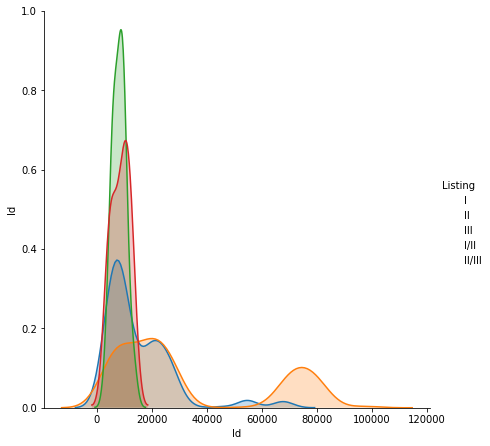

In [ ]:
import seaborn as sns

tempX = cites_listings[ cites_listings.All_DistributionISOCodes.isin( crb_countries)]
tempY = cites_listings[ cites_listings.Listing.isin( ['II'])]

x = 'All_DistributionISOCodes'
y = 'Listing'
data = cites_listings

#sns.countplot( x= cites_listings.All_DistributionISOCodes.isin( crb_countries).value_counts(), 
#               hue= cites_listings.Listing);

sns.pairplot( cites_listings, hue= 'Listing', height= 6);

In [ ]:
tempX.sample(3)

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Scientific Name,Author,Rank,Listing,Party,Listed under,Full note,# Full note,All_DistributionFullNames,All_DistributionISOCodes,NativeDistributionFullNames,Introduced_Distribution,Introduced(?)_Distribution,Reintroduced_Distribution,Extinct_Distribution,Extinct(?)_Distribution,Distribution_Uncertain
4396,80822,Plantae,NaN,NaN,Orchidales,Orchidaceae,Eulophia,sylviae,NaN,Eulophia sylviae,"Geerinck, 1990",SPECIES,II,NaN,Orchidaceae spp.,**II** [FAMILY listing Orchidaceae spp.] Inclu...,"**II** #4 All parts and derivatives, except: a...",Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
1862,26063,Plantae,NaN,NaN,Cyatheales,Cyatheaceae,Alsophila,loubetiana,NaN,Alsophila loubetiana,L.Linden 1900,SPECIES,II,NaN,Alsophila spp.,**II** [GENUS listing Alsophila spp.] Listed u...,"**II** #4 All parts and derivatives, except:\n...",Congo,CG,Congo,NaN,NaN,NaN,NaN,NaN,NaN
3654,29197,Plantae,NaN,NaN,Orchidales,Orchidaceae,Bulbophyllum,hirsutissimum,NaN,Bulbophyllum hirsutissimum,Kraenzl.,SPECIES,II,NaN,Orchidaceae spp.,**II** [FAMILY listing Orchidaceae spp.] Inclu...,"**II** #4 All parts and derivatives, except: a...",Cameroon,CM,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tempX[ cites_listings.Listing.isin( ['I'])].sample(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Scientific Name,Author,Rank,Listing,Party,Listed under,Full note,# Full note,All_DistributionFullNames,All_DistributionISOCodes,NativeDistributionFullNames,Introduced_Distribution,Introduced(?)_Distribution,Reintroduced_Distribution,Extinct_Distribution,Extinct(?)_Distribution,Distribution_Uncertain
5567,25013,Plantae,NaN,NaN,Cycadales,Zamiaceae,Encephalartos,schaijesii,NaN,Encephalartos schaijesii,"Malaisse, Sclavo & Crosiers",SPECIES,I,NaN,Encephalartos spp.,NaN,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
5554,23600,Plantae,NaN,NaN,Cycadales,Zamiaceae,Encephalartos,marunguensis,NaN,Encephalartos marunguensis,Devred,SPECIES,I,NaN,Encephalartos spp.,NaN,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
246,8333,Animalia,Chordata,Mammalia,Primates,Hominidae,Pan,paniscus,NaN,Pan paniscus,"Schwartz, 1929",SPECIES,I,NaN,Pan spp.,**I** [GENUS listing Pan spp.] Included in Pan...,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cites_listings[ cites_listings[ "Scientific Name"].isin( demoList_NEW)]

,Id,Kingdom,Phylum,Class,Order,Family,Genus,Species,Subspecies,Scientific Name,Author,Rank,Listing,Party,Listed under,Full note,# Full note,All_DistributionFullNames,All_DistributionISOCodes,NativeDistributionFullNames,Introduced_Distribution,Introduced(?)_Distribution,Reintroduced_Distribution,Extinct_Distribution,Extinct(?)_Distribution,Distribution_Uncertain
246,8333,Animalia,Chordata,Mammalia,Primates,Hominidae,Pan,paniscus,NaN,Pan paniscus,"Schwartz, 1929",SPECIES,I,NaN,Pan spp.,**I** [GENUS listing Pan spp.] Included in Pan...,NaN,Democratic Republic of the Congo,CD,Democratic Republic of the Congo,NaN,NaN,NaN,NaN,NaN,NaN
289,9369,Animalia,Chordata,Mammalia,Primates,Lorisidae,Pseudopotto,martini,NaN,Pseudopotto martini,"Schwartz, 1996",SPECIES,II,NaN,Primates spp.,NaN,NaN,Cameroon,CM,NaN,NaN,NaN,NaN,NaN,NaN,Cameroon


In [ ]:
cites_listings.shape

(5581, 26)